In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("..\Data\clean_data_for_model.csv")

In [3]:
data.head()

,company_Accenture,company_Adobe,company_Amazon,company_Apple,company_Atlassian,company_Bloomberg,company_ByteDance,company_Capital One,company_Cisco,company_Dell Technologies,...,region_South America,region_South-Eastern Asia,region_Southern Europe,region_UK&IRE,region_USA,region_Western Europe,totalyearlycompensation,yearsofexperience,yearsatcompany,education
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,150000,5.0,2.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,242000,20.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,121000,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,160000,4.0,2.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,150000,10.0,4.0,1.0


In [4]:
#X, y split:

In [4]:
y = data["totalyearlycompensation"]
X = data.drop(["totalyearlycompensation"],axis =1)

In [5]:
#Checking the logarithm of y:

In [6]:
y_log = np.log(y)

(array([1.680e+02, 4.850e+02, 1.021e+03, 4.023e+03, 9.921e+03, 6.209e+03,
        1.381e+03, 1.340e+02, 1.000e+01, 3.000e+00]),
 array([ 9.21034037,  9.83140038, 10.45246039, 11.0735204 , 11.6945804 ,
        12.31564041, 12.93670042, 13.55776043, 14.17882043, 14.79988044,
        15.42094045]),
 <BarContainer object of 10 artists>)

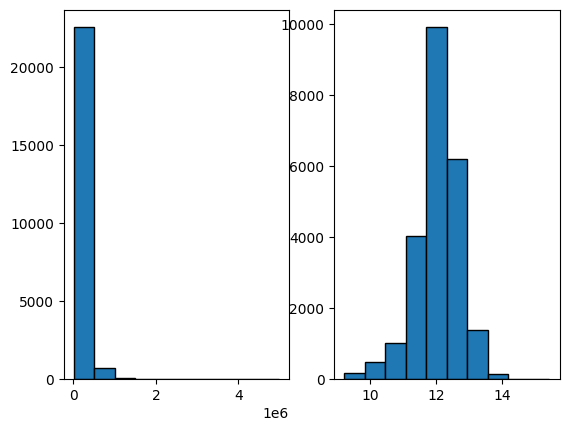

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(y, edgecolor='black')
axs[1].hist(y_log, edgecolor='black')

In [ ]:
# y_log = np.log(y)
# model.fit(X_trans_scaled, y_log)
# y_pred_log = model.predict(X_trans_scaled)
# y_pred = np.exp(y_pred_log)
# compute error metrics

In [7]:
# Train test split:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [8]:
print(X_train.shape)
print(X_test.shape)

(16348, 91)
(7007, 91)


In [9]:
# Separating original numerical columns to apply transformation and scaling on them, and encoded columns until further merge:

In [10]:
X_train_num = X_train[["yearsofexperience", "yearsatcompany", "education"]]
X_test_num = X_test[["yearsofexperience", "yearsatcompany", "education"]]

In [11]:
columns_to_drop = ["yearsofexperience", "yearsatcompany", "education"]
X_train_enc = X_train.drop(columns=columns_to_drop)
X_test_enc = X_test.drop(columns=columns_to_drop)

In [11]:
# Transforming data with PowerTransformer in order to make distribution more normal.
# As a result we will see that all means are almost 0, and all std.deviations are around 1

In [12]:
pt = PowerTransformer()
pt.fit(X_train_num) # only to the numericals, not the encoded

filename = "../Transformers/PowerTransformer_stem.pickle"

with open(filename, "wb") as file:
        pickle.dump(pt,file)
        
X_train_transformed_np = pt.transform(X_train_num)
X_train_transformed_df =pd.DataFrame(pt.transform(X_train_num), columns=X_train_num.columns)

X_test_transformed_np = pt.transform(X_test_num)
X_test_transformed_df =pd.DataFrame(pt.transform(X_test_num), columns=X_test_num.columns)

In [13]:
X_train_transformed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearsofexperience,16348.0,1.260444e-17,1.000031,-2.018261,-0.663178,0.042522,0.694595,3.108107
yearsatcompany,16348.0,-2.260107e-17,1.000031,-1.335874,-1.335874,0.187082,0.816124,2.964501
education,16348.0,1.080070e-16,1.000031,-3.227088,-0.925364,0.717539,0.717539,2.675278


In [14]:
X_test_transformed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearsofexperience,7007.0,0.002668,1.003211,-2.018261,-0.663178,0.042522,0.694595,4.358662
yearsatcompany,7007.0,-0.000027,0.989415,-1.335874,-1.335874,0.187082,0.816124,3.413233
education,7007.0,-0.021020,0.998390,-3.227088,-0.925364,0.717539,0.717539,2.675278


In [15]:
X_train_transformed_df.head()

,yearsofexperience,yearsatcompany,education
0,-0.663178,-0.346743,0.717539
1,0.829401,-0.346743,0.717539
2,0.395370,1.484157,0.717539
3,-0.986981,0.187082,-0.925364
4,1.298042,1.029508,-0.925364


In [16]:
# Scaling data with MinMaxScaler in order to make the range of values in all variable the same.
# As a result we will see that all the min values are 0, and all teh max values are 1.

In [17]:
scaler = MinMaxScaler().fit(X_train_transformed_df)

filename = "../Scalers/MinMaxScaler_stem.pickle"

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_train_trans_scaled = scaler.transform(X_train_transformed_df) # only on the numericals transformed
X_train_trans_scaled_df = pd.DataFrame(X_train_trans_scaled, columns=X_train_transformed_df.columns)

X_test_trans_scaled = scaler.transform(X_test_transformed_df)
X_test_trans_scaled_df = pd.DataFrame(X_test_trans_scaled, columns=X_test_transformed_df.columns)

In [18]:
X_train_trans_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearsofexperience,16348.0,0.393702,0.195076,0.0,0.264336,0.401997,0.529196,1.0
yearsatcompany,16348.0,0.310641,0.232545,0.0,0.000000,0.354145,0.500421,1.0
education,16348.0,0.546745,0.169429,0.0,0.389966,0.668313,0.668313,1.0


In [19]:
X_test_trans_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearsofexperience,7007.0,0.394222,0.195696,0.0,0.264336,0.401997,0.529196,1.243946
yearsatcompany,7007.0,0.310635,0.230077,0.0,0.000000,0.354145,0.500421,1.104347
education,7007.0,0.543184,0.169151,0.0,0.389966,0.668313,0.668313,1.000000


In [19]:
# Now I am concatenating back transformed_scaled data to encoded columns.
# Before doing that I am resetting the indexes.

In [20]:
X_train_enc = X_train_enc.reset_index(drop=True)
X_train_trans_scaled_df = X_train_trans_scaled_df.reset_index(drop=True)

X_test_enc = X_test_enc.reset_index(drop=True)
X_test_trans_scaled_df = X_test_trans_scaled_df.reset_index(drop=True)

In [21]:
X_train_new = pd.concat([X_train_enc, X_train_trans_scaled_df], axis=1)
X_test_new = pd.concat([X_test_enc, X_test_trans_scaled_df], axis=1)

In [22]:
#LinearRegression

In [22]:
lm = linear_model.LinearRegression()
lm.fit(X_train_new, y_train)

filename = "../Models/LinearRegression_stem.pickle"

with open(filename, "wb") as file:
        pickle.dump(lm,file)

In [23]:
y_pred = lm.predict(X_test_new)

In [24]:
y_pred_train = lm.predict(X_train_new)
print("R2 of a train set:", r2_score(y_train, y_pred_train))
y_pred_test = lm.predict(X_test_new)
print("R2 of a test set:", r2_score(y_test, y_pred_test))

R2 of a train set: 0.5500338262288866
R2 of a test set: 0.5757534286082644


In [ ]:
#KNN Regression

In [ ]:
#Before running KNN model, I need to calculate the best possible K. I will test a range of K from 2 to 11 (10 options)

In [25]:
list(range(2,12))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [92]:
knn_models = {} # keys = k_distance_p, value = model
weights = ["uniform","distance"]
p_values = [1,2,3]
scores = {}
for k in range(2,12):
    for weight in weights:
        for value in p_values:
            model = KNeighborsRegressor(n_neighbors=k,weights=weight,p=value)
            print("Training the k-NN model with {} neighbours with weights {} and p set to {}...".format(k,weight,value))
            model.fit(X_train_new, y_train)
            knn_models[str(k)+"_"+weight+"_"+str(value)] = model
            scores[str(k)+"_"+weight+"_"+str(value)] = model.score(X_test_new, y_test)
            print()

Training the k-NN model with 2 neighbours with weights uniform and p set to 1...

Training the k-NN model with 2 neighbours with weights uniform and p set to 2...

Training the k-NN model with 2 neighbours with weights uniform and p set to 3...

Training the k-NN model with 2 neighbours with weights distance and p set to 1...

Training the k-NN model with 2 neighbours with weights distance and p set to 2...

Training the k-NN model with 2 neighbours with weights distance and p set to 3...

Training the k-NN model with 3 neighbours with weights uniform and p set to 1...

Training the k-NN model with 3 neighbours with weights uniform and p set to 2...

Training the k-NN model with 3 neighbours with weights uniform and p set to 3...

Training the k-NN model with 3 neighbours with weights distance and p set to 1...

Training the k-NN model with 3 neighbours with weights distance and p set to 2...

Training the k-NN model with 3 neighbours with weights distance and p set to 3...

Training t

In [98]:
knn_scores = {}
for key in knn_models.keys():
    knn_scores[key] = knn_models[key].score(X_test_new, y_test)

knn_scores

{'2_uniform_1': 0.4115711470938592,
 '2_uniform_2': 0.41639533662950245,
 '2_uniform_3': 0.4234425215241516,
 '2_distance_1': 0.3786585278035145,
 '2_distance_2': 0.38822251836672605,
 '2_distance_3': 0.39733848618090695,
 '3_uniform_1': 0.4956718296091982,
 '3_uniform_2': 0.5040537503641362,
 '3_uniform_3': 0.5046958977376348,
 '3_distance_1': 0.4516398390622097,
 '3_distance_2': 0.4675750212902172,
 '3_distance_3': 0.47226217813290317,
 '4_uniform_1': 0.5326091342493624,
 '4_uniform_2': 0.5358328423385332,
 '4_uniform_3': 0.5370639985051494,
 '4_distance_1': 0.492544241175389,
 '4_distance_2': 0.5022949931175219,
 '4_distance_3': 0.5069132220453896,
 '5_uniform_1': 0.5584079971381469,
 '5_uniform_2': 0.5584312947986925,
 '5_uniform_3': 0.5582458878500093,
 '5_distance_1': 0.5223295481207204,
 '5_distance_2': 0.5288998100557354,
 '5_distance_3': 0.5310828332732751,
 '6_uniform_1': 0.5686294609610386,
 '6_uniform_2': 0.5656523662183384,
 '6_uniform_3': 0.5650732369284607,
 '6_distance_

In [102]:
knn_scores_sorted = dict(sorted(knn_scores.items(), key=lambda item: item[1], reverse=True) )
knn_scores_sorted

{'9_uniform_1': 0.5785994061744406,
 '7_uniform_1': 0.5776804678488259,
 '8_uniform_1': 0.5766325350471915,
 '10_uniform_1': 0.575364032331025,
 '9_uniform_2': 0.5743458452731782,
 '11_uniform_1': 0.5742254031082363,
 '9_uniform_3': 0.5734936267555153,
 '8_uniform_3': 0.57302624613753,
 '8_uniform_2': 0.5729891336262772,
 '7_uniform_2': 0.5726519180457078,
 '11_uniform_2': 0.572534003599326,
 '10_uniform_2': 0.572432924218641,
 '7_uniform_3': 0.572082410962008,
 '10_uniform_3': 0.5708300567796585,
 '11_uniform_3': 0.570631609935011,
 '6_uniform_1': 0.5686294609610386,
 '6_uniform_2': 0.5656523662183384,
 '6_uniform_3': 0.5650732369284607,
 '11_distance_2': 0.5603097468273864,
 '11_distance_3': 0.5593125768076836,
 '9_distance_2': 0.5588292350808531,
 '9_distance_3': 0.5585458202983378,
 '10_distance_2': 0.558496811234336,
 '10_distance_3': 0.5584605061058971,
 '5_uniform_2': 0.5584312947986925,
 '5_uniform_1': 0.5584079971381469,
 '11_distance_1': 0.5582754909307598,
 '5_uniform_3': 0.

In [ ]:
# The best model is the one with 9 neighbours, uniform weigh and Manhattan distance - r2 is 0.58

In [26]:
knn = KNeighborsRegressor(n_neighbors=9, weights='uniform', p=1)
knn.fit(X_train_new, y_train)

filename = "../Models/KNNRegressor_stem.pickle"

with open(filename, "wb") as file:
        pickle.dump(knn,file)

In [31]:
print("Train data R2 was: {:.2f}".format(knn.score(X_train_new, y_train)))
print("Test data R2 was: {:.2f}".format(knn.score(X_test_new, y_test)))

Train data R2 was: 0.61
Test data R2 was: 0.58


In [ ]:
# Decision Tree:

In [113]:
#Applying GridSearch in order to look for the best parameters to fit the model:
# 4*2*3*3*5 =8*9*5=360
max_depth_choices = [3,4,5,6]
criterion_choices = ['squared_error','absolute_error']
min_samples_split_choices = [2,6,10]
min_samples_leaf_choices = [2,6,10]   

In [114]:
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [115]:
model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)

In [116]:
grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 6, 10],
                         'min_samples_split': [2, 6, 10]})

In [117]:
#after running the above code forever, the winner is:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [32]:
#Setting up the model with the best parameters
regr = DecisionTreeRegressor(max_depth=6,
                             criterion = 'squared_error',
                             min_samples_split = 2,
                             min_samples_leaf = 6,
                             max_features = 91)

regr.fit(X_train_new, y_train)

filename = "../Models/DecisionTree_stem.pickle"

with open(filename, "wb") as file:
        pickle.dump(regr,file)

print("Train data R2 was: {:.2f}".format(regr.score(X_train_new, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(X_test_new, y_test)))

Train data R2 was: 0.53
Test data R2 was: 0.51


In [37]:
%%writefile -a functions.py
def train_models(models, X_train, y_train):
    
    """
    This function trains a list of provided models.
    Args:
       models: a list of models with default or selected parameters
       X_train: train set with independent variables
       y_train: predicted variable from the train set
    Returns:
       trained models
    """
    for model in models:
        model.fit(X_train, y_train)
    return models

Appending to functions.py


In [47]:
import functions
models = [LinearRegression(), 
          KNeighborsRegressor(n_neighbors=9, weights='uniform', p=1), 
          DecisionTreeRegressor(max_depth=6,
                             criterion = 'squared_error',
                             min_samples_split = 2,
                             min_samples_leaf = 6,
                             max_features = 91)]

models = functions.train_models(models, X_train_new, y_train)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [54]:
#%%writefile -a functions.py

def error_metrics_calculations(y_true, y_pred):

    """
    This function given a model predicted and real values calculates error metrics.
    Args:
       y_true: actual y values in a test set
       y_pred: predicted by model y values
    Returns:
       pandas.DataFrame: the dataframe with error metrics name and values
    """
        
    error_metrics = {"MAE": mean_absolute_error(y_true, y_pred), 'MSE': mean_squared_error(y_true, y_pred), 
                     'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)), 'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
                     'R2': r2_score(y_true, y_pred)}
    df = pd.DataFrame(list(error_metrics.items()), columns=['Error_metric', 'Value'])
    return df

Appending to functions.py


In [56]:
#import functions
for model in models:
    y_pred = model.predict(X_train_new)
    print("Train set:", model)
    display(error_metrics_calculations(y_train, y_pred))
    y_pred = model.predict(X_test_new)
    print("Test set:", model)
    display(error_metrics_calculations(y_test, y_pred))


Train set: LinearRegression()


,Error_metric,Value
0,MAE,5.370698e+04
1,MSE,1.002844e+10
2,RMSE,1.001421e+05
3,MAPE,3.298288e+01
4,R2,5.500338e-01


Test set: LinearRegression()


,Error_metric,Value
0,MAE,5.482637e+04
1,MSE,7.876982e+09
2,RMSE,8.875236e+04
3,MAPE,3.329218e+01
4,R2,5.757534e-01


Train set: KNeighborsRegressor(n_neighbors=9, p=1)


,Error_metric,Value
0,MAE,4.861953e+04
1,MSE,8.666207e+09
2,RMSE,9.309246e+04
3,MAPE,2.921082e+01
4,R2,6.111558e-01


Test set: KNeighborsRegressor(n_neighbors=9, p=1)


,Error_metric,Value
0,MAE,5.486385e+04
1,MSE,7.824141e+09
2,RMSE,8.845417e+04
3,MAPE,3.288207e+01
4,R2,5.785994e-01


Train set: DecisionTreeRegressor(max_depth=6, max_features=91, min_samples_leaf=6)


,Error_metric,Value
0,MAE,5.885997e+04
1,MSE,1.041023e+10
2,RMSE,1.020305e+05
3,MAPE,3.443420e+01
4,R2,5.329031e-01


Test set: DecisionTreeRegressor(max_depth=6, max_features=91, min_samples_leaf=6)


,Error_metric,Value
0,MAE,5.961114e+04
1,MSE,9.081887e+09
2,RMSE,9.529893e+04
3,MAPE,3.500258e+01
4,R2,5.108584e-01
